In [2]:
import multiprocessing
import sys
from pettingzoo.test import parallel_api_test
from citylearn import GridLearn
from citylearn import MyEnv
from pathlib import Path
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3 import PPO
import gym
import numpy as np
import supersuit as ss

import time

# multiprocessing.set_start_method("fork")

climate_zone = 1
data_path = Path("../citylearn/data/Climate_Zone_"+str(climate_zone))
buildings_states_actions = '../citylearn/buildings_state_action_space.json'

config = {
    "data_path":data_path,
    "climate_zone":climate_zone,
    "buildings_states_actions_file":buildings_states_actions,
    "hourly_timesteps":4,
    "max_num_houses":4
}

grid = GridLearn(**config)

envs = [MyEnv(grid), MyEnv(grid)]

print('padding action/observation spaces...')
envs = [ss.pad_action_space_v0(env) for env in envs]
envs = [ss.pad_observations_v0(env) for env in envs]

print('creating pettingzoo env...')
envs = [ss.pettingzoo_env_to_vec_env_v0(env) for env in envs]

print('stacking vec env...')
nenvs = 2
envs = [ss.concat_vec_envs_v0(env, nenvs, num_cpus=1, base_class='stable_baselines3') for env in envs]

../citylearn/buildings_state_action_space.json


/Users/aislingpigott/Documents/CityLearn/citylearn/energy_models.py:508: RuntimeWarning: divide by zero encountered in true_divide
  self.cooling_device.cop_cooling = self.cooling_device.eta_tech*(np.add(self.cooling_device.t_target_cooling,273.15))/np.subtract(self.sim_results['t_out'],self.cooling_device.t_target_cooling)
/Users/aislingpigott/Documents/CityLearn/citylearn/energy_models.py:508: RuntimeWarning: divide by zero encountered in true_divide
  self.cooling_device.cop_cooling = self.cooling_device.eta_tech*(np.add(self.cooling_device.t_target_cooling,273.15))/np.subtract(self.sim_results['t_out'],self.cooling_device.t_target_cooling)
/Users/aislingpigott/Documents/CityLearn/citylearn/energy_models.py:508: RuntimeWarning: divide by zero encountered in true_divide
  self.cooling_device.cop_cooling = self.cooling_device.eta_tech*(np.add(self.cooling_device.t_target_cooling,273.15))/np.subtract(self.sim_results['t_out'],self.cooling_device.t_target_cooling)
/Users/aislingpigott/D

padding action/observation spaces...
creating pettingzoo env...
stacking vec env...


In [3]:
from copy import deepcopy
grid2 = deepcopy(grid)

In [4]:
grids = [grid, grid2]

In [5]:
print('setting the grid...')
for env in envs:
    for n in range(nenvs):
        env.venv.vec_envs[n].par_env.aec_env.env.env.env.env.grid = grids[n]

setting the grid...


In [6]:
models = [PPO(MlpPolicy, env, verbose=2, gamma=0.999, batch_size=2, n_steps=1, ent_coef=0.01, learning_rate=0.00025, vf_coef=0.5, max_grad_norm=0.5, gae_lambda=0.95, n_epochs=4, clip_range=0.2, clip_range_vf=1) for env in envs]

Using cpu device
Using cpu device


In [7]:
for _ in range(5):
    for model in models:
        model.learn(1, reset_num_timesteps=False)

calling reset...
calling reset...
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615'] dict_keys(['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615'])
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_ob

----------------------------------------
| time/                   |            |
|    fps                  | 143        |
|    iterations           | 1          |
|    time_elapsed         | 0          |
|    total_timesteps      | 48         |
| train/                  |            |
|    approx_kl            | 0.04443547 |
|    clip_fraction        | 0.156      |
|    clip_range           | 0.2        |
|    clip_range_vf        | 1          |
|    entropy_loss         | -5.68      |
|    explained_variance   | -3.59e+03  |
|    learning_rate        | 0.00025    |
|    loss                 | -0.117     |
|    n_updates            | 8          |
|    policy_gradient_loss | -0.0178    |
|    std                  | 0.999      |
|    value_loss           | 0.000129   |
----------------------------------------
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers

<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
['JHBY9', 'JBAQL', 'LES9Y', '2M98F', 'S2XQ6', '345W1', 'VLHS7', 'CXJI5', 'PZBNG', 'E70SA', 'W0KRL', 'RIXLD'] dict_keys(['JHBY9', 'JBAQL', 'LES9Y', '2M98F', 'S2XQ6', '345W1', 'VLHS7', 'CXJI5', 'PZBNG', 'E70SA', 'W0KRL', 'RIXLD'])
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supersuit.aec

In [14]:
np.array(env.venv.vec_envs[n].par_env.aec_env.env.env.env.env.grid.voltage_data).shape

(10, 33)

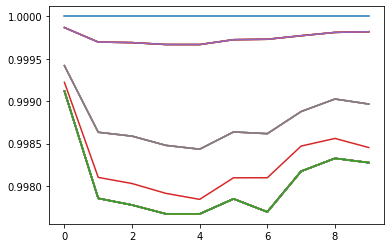

In [19]:
import matplotlib.pyplot as plt

for i in range(33):
    plt.plot(np.arange(10), np.array(grid.voltage_data)[:,i])
    
plt.savefig('voltage')

In [54]:
obss = [env.reset() for env in envs]
for _ in range(5):
    for m in range(len(models)):
        
        # get the current observation from the perspective of this team
        foo = []
        for e in range(nenvs):
            bar = list(envs[m].venv.vec_envs[e].par_env.aec_env.env.state().values())
            for i in range(len(bar)):
                while len(bar[i]) < 29:
                    bar[i] = np.append(bar[i], 0)
            foo += bar

        foo = np.vstack(foo)
        obss[m] = np.vstack(foo)

        action = models[m].predict(obss[m])[0]
        obss[m], reward, done, info = envs[m].step(action)

calling reset...
['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615', '28S2R', 'Z8YJE', 'IQJVW', 'NFSDD']
calling reset...
['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615', '28S2R', 'Z8YJE', 'IQJVW', 'NFSDD']
calling reset...
['JHBY9', 'JBAQL', 'LES9Y', '2M98F', 'S2XQ6', '345W1', 'VLHS7', 'CXJI5', 'PZBNG', 'E70SA', 'W0KRL', 'RIXLD', 'F8JVP', 'DWS97', 'ZJPSA', 'GIHSQ']
calling reset...
['JHBY9', 'JBAQL', 'LES9Y', '2M98F', 'S2XQ6', '345W1', 'VLHS7', 'CXJI5', 'PZBNG', 'E70SA', 'W0KRL', 'RIXLD', 'F8JVP', 'DWS97', 'ZJPSA', 'GIHSQ']
['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615', '28S2R', 'Z8YJE', 'IQJVW', 'NFSDD']
['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615', '28S2R', 'Z8YJE', 'IQJVW', 'NFSDD']
<class 'supersuit.aec_wrappers.pad_observations'>
<class 'supe

     name      p_mw
0   88CD4  0.010463
1   JHBY9  0.036103
2   24SN7  0.010055
3   JBAQL  0.009664
4   P5FGI  0.001508
5   LES9Y  0.001558
6   9QOS6  0.008093
7   2M98F  0.006874
8   ZQTR7  0.008650
9   S2XQ6  0.007915
10  U70RH  0.010320
11  345W1  0.035011
12  L8ZSS  0.009668
13  VLHS7  0.010117
14  52MA3  0.002212
15  CXJI5  0.002256
16  1EJ37  0.007277
17  PZBNG  0.007783
18  C8A0A  0.006613
19  E70SA  0.006621
20  B9FBM  0.008765
21  W0KRL  0.016617
22  10615  0.002050
23  RIXLD  0.007315
24  28S2R  0.008256
25  F8JVP  0.007161
26  Z8YJE  0.001549
27  DWS97  0.000869
28  IQJVW  0.037111
29  ZJPSA  0.011356
30  NFSDD  0.008225
31  GIHSQ  0.039005
['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615', '28S2R', 'Z8YJE', 'IQJVW', 'NFSDD']
['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615', '28S2R', 'Z8YJE', 'IQJVW', 'NFSDD']
<class 'supersuit.aec_wrappers.pad_observations'>


     name      p_mw
0   88CD4  0.009104
1   JHBY9  0.007162
2   24SN7  0.008917
3   JBAQL  0.006380
4   P5FGI  0.025542
5   LES9Y  0.001586
6   9QOS6  0.007338
7   2M98F  0.006768
8   ZQTR7  0.037505
9   S2XQ6  0.024687
10  U70RH  0.008104
11  345W1  0.011851
12  L8ZSS  0.007328
13  VLHS7  0.007013
14  52MA3  0.003698
15  CXJI5  0.025545
16  1EJ37  0.010936
17  PZBNG  0.042025
18  C8A0A  0.010143
19  E70SA  0.009362
20  B9FBM  0.007111
21  W0KRL  0.007132
22  10615  0.001892
23  RIXLD  0.010917
24  28S2R  0.007472
25  F8JVP  0.025594
26  Z8YJE  0.001563
27  DWS97  0.000840
28  IQJVW  0.007722
29  ZJPSA  0.007598
30  NFSDD  0.007281
31  GIHSQ  0.006596
['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615', '28S2R', 'Z8YJE', 'IQJVW', 'NFSDD']
['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615', '28S2R', 'Z8YJE', 'IQJVW', 'NFSDD']
<class 'supersuit.aec_wrappers.pad_observations'>


     name      p_mw
0   88CD4  0.007137
1   JHBY9  0.025925
2   24SN7  0.007238
3   JBAQL  0.008374
4   P5FGI  0.004693
5   LES9Y  0.001592
6   9QOS6  0.005577
7   2M98F  0.007630
8   ZQTR7  0.011266
9   S2XQ6  0.005327
10  U70RH  0.005405
11  345W1  0.005758
12  L8ZSS  0.008628
13  VLHS7  0.010225
14  52MA3  0.002213
15  CXJI5  0.001811
16  1EJ37  0.008285
17  PZBNG  0.007251
18  C8A0A  0.006322
19  E70SA  0.008060
20  B9FBM  0.006569
21  W0KRL  0.008566
22  10615  0.001598
23  RIXLD  0.009266
24  28S2R  0.007410
25  F8JVP  0.008518
26  Z8YJE  0.001630
27  DWS97  0.000858
28  IQJVW  0.008269
29  ZJPSA  0.007086
30  NFSDD  0.010257
31  GIHSQ  0.007540
['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615', '28S2R', 'Z8YJE', 'IQJVW', 'NFSDD']
['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615', '28S2R', 'Z8YJE', 'IQJVW', 'NFSDD']
<class 'supersuit.aec_wrappers.pad_observations'>


     name      p_mw
0   88CD4  0.005974
1   JHBY9  0.005216
2   24SN7  0.007427
3   JBAQL  0.006472
4   P5FGI  0.001795
5   LES9Y  0.001587
6   9QOS6  0.007989
7   2M98F  0.014702
8   ZQTR7  0.005277
9   S2XQ6  0.005914
10  U70RH  0.009056
11  345W1  0.007127
12  L8ZSS  0.006406
13  VLHS7  0.007726
14  52MA3  0.001554
15  CXJI5  0.004048
16  1EJ37  0.008288
17  PZBNG  0.008998
18  C8A0A  0.014477
19  E70SA  0.007780
20  B9FBM  0.008669
21  W0KRL  0.006743
22  10615  0.002491
23  RIXLD  0.005154
24  28S2R  0.005971
25  F8JVP  0.008250
26  Z8YJE  0.003853
27  DWS97  0.000839
28  IQJVW  0.006625
29  ZJPSA  0.008216
30  NFSDD  0.008394
31  GIHSQ  0.005790
['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615', '28S2R', 'Z8YJE', 'IQJVW', 'NFSDD']
['88CD4', '24SN7', 'P5FGI', '9QOS6', 'ZQTR7', 'U70RH', 'L8ZSS', '52MA3', '1EJ37', 'C8A0A', 'B9FBM', '10615', '28S2R', 'Z8YJE', 'IQJVW', 'NFSDD']
<class 'supersuit.aec_wrappers.pad_observations'>


     name      p_mw
0   88CD4  0.005730
1   JHBY9  0.007003
2   24SN7  0.006672
3   JBAQL  0.006151
4   P5FGI  0.002003
5   LES9Y  0.001535
6   9QOS6  0.008723
7   2M98F  0.005442
8   ZQTR7  0.009036
9   S2XQ6  0.005787
10  U70RH  0.006476
11  345W1  0.006677
12  L8ZSS  0.006819
13  VLHS7  0.005621
14  52MA3  0.001747
15  CXJI5  0.002054
16  1EJ37  0.009658
17  PZBNG  0.007918
18  C8A0A  0.006251
19  E70SA  0.005574
20  B9FBM  0.006879
21  W0KRL  0.006936
22  10615  0.001538
23  RIXLD  0.009077
24  28S2R  0.008568
25  F8JVP  0.020525
26  Z8YJE  0.001615
27  DWS97  0.000881
28  IQJVW  0.005846
29  ZJPSA  0.007633
30  NFSDD  0.008520
31  GIHSQ  0.025997


In [51]:
from guppy import hpy

h= hpy()
h.heap()


Partition of a set of 49165154 objects. Total size = 2194313070 bytes.
 Index  Count   %     Size   % Cumulative  % Kind (class / dict of class)
     0 47096630  96 1507092160  69 1507092160  69 numpy.float64
     1  13111   0 520870800  24 2027962960  92 list
     2 257244   1 34628394   2 2062591354  94 str
     3 1142760   2 27426240   1 2090017594  95 float
     4 251726   1 21485512   1 2111503106  96 tuple
     5   2417   0 18429180   1 2129932286  97 numpy.ndarray
     6 107401   0  8679812   0 2138612098  97 bytes
     7  54630   0  7908704   0 2146520802  98 types.CodeType
     8  21579   0  7387128   0 2153907930  98 dict (no owner)
     9  50379   0  7254576   0 2161162506  98 function
<3814 more rows. Type e.g. '_.more' to view.>

In [52]:
len(grid.buildings)

32

In [53]:
2000/484

4.132231404958677